In [3]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
from sklearn import model_selection
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [4]:
data_root_dir = r'D:\CIC\Train and Test\Filter Corr Attr'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [5]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()


# 'n_estimators' is equal to the numebr of trees
adaBoost1 = AdaBoostClassifier(n_estimators=100)
adaBoost1.fit(X_train, y_train)

predictions = adaBoost1.predict(X_test)
confusion_matrix(y_test, predictions)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

print(f"Total time: {endTime - startTime:0.4f} seconds \n")

Total time: 11312.4907 seconds 



In [6]:
results = confusion_matrix(y_test, predictions)
error = zero_one_loss(y_test, predictions)
score = accuracy_score(y_test, predictions) * 100
report = classification_report(y_test, predictions)


In [7]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("AdaBoost Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{results[0]}")
print(f"{results[1]} \n")

print("Report :")
print(report) 

print(f"True Postive   : {results[0][0]}")
print(f"False Positive : {results[0][1]}")
print(f"False Negative : {results[1][0]}")
print(f"True Negative  : {results[1][1]}")
print(f"Error Value    : {error}")
print(f"Accuracy_Score : {score}")
print("=================================================")

Total time: 11312.4907 seconds 

AdaBoost Classifier Results
Confusion Matrix:
[3998621   18049]
[ 49975 774528] 

Report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   4016670
           1       0.98      0.94      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.98      0.97      0.97   4841173
weighted avg       0.99      0.99      0.99   4841173

True Postive   : 3998621
False Positive : 18049
False Negative : 49975
True Negative  : 774528
Error Value    : 0.014051140085264424
Accuracy_Score : 98.59488599147356


In [8]:
X_test.shape

(4841173, 64)

In [9]:
feature_importances = pd.Series(adaBoost1.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Init Fwd Win Byts    0.30
Dst Port             0.07
Flow IAT Mean        0.07
Init Bwd Win Byts    0.07
Fwd Pkt Len Std      0.06
TotLen Fwd Pkts      0.05
Fwd Header Len       0.05
Bwd Pkt Len Max      0.03
Flow Duration        0.02
TotLen Bwd Pkts      0.02
Fwd Pkt Len Max      0.02
Bwd Pkt Len Mean     0.02
Flow IAT Min         0.02
Fwd IAT Min          0.02
Bwd IAT Max          0.02
Fwd Pkts/s           0.02
Bwd Pkts/s           0.02
Fwd Seg Size Avg     0.02
Idle Mean            0.02
Flow IAT Max         0.01
Fwd IAT Tot          0.01
Fwd IAT Std          0.01
Fwd IAT Max          0.01
Pkt Len Var          0.01
ACK Flag Cnt         0.01
ECE Flag Cnt         0.01
Fwd Seg Size Min     0.01
Protocol             0.00
Tot Fwd Pkts         0.00
Tot Bwd Pkts         0.00
Fwd Pkt Len Min      0.00
Fwd Pkt Len Mean     0.00
Bwd Pkt Len Min      0.00
Flow Byts/s          0.00
Flow Pkts/s          0.00
Flow IAT Std         0.00
Fwd IAT Mean         0.00
Bwd IAT Tot          0.00
Bwd IAT Mean

Top 20 features:
---------------------------------
Init Fwd Win Byts    0.30
Dst Port             0.07
Flow IAT Mean        0.07
Init Bwd Win Byts    0.07
Fwd Pkt Len Std      0.06
TotLen Fwd Pkts      0.05
Fwd Header Len       0.05
Bwd Pkt Len Max      0.03
Flow Duration        0.02
TotLen Bwd Pkts      0.02
Fwd Pkt Len Max      0.02
Bwd Pkt Len Mean     0.02
Flow IAT Min         0.02
Fwd IAT Min          0.02
Bwd IAT Max          0.02
Fwd Pkts/s           0.02
Bwd Pkts/s           0.02
Fwd Seg Size Avg     0.02
Idle Mean            0.02
Flow IAT Max         0.01
dtype: float64


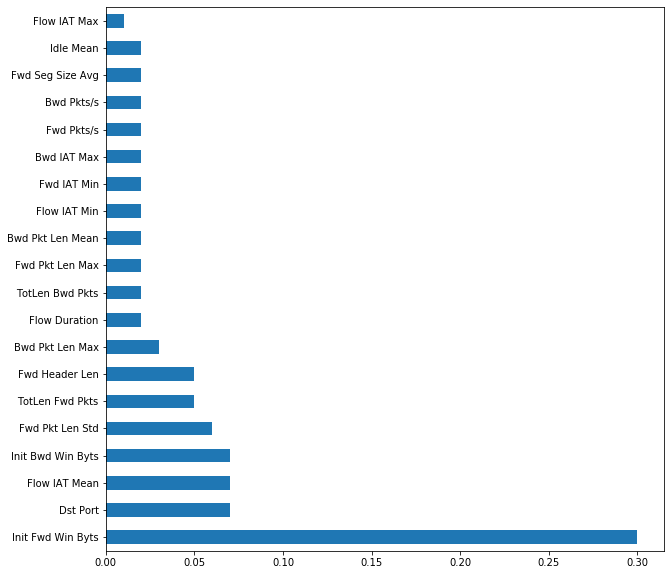

In [10]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Protocol            0.0
Tot Fwd Pkts        0.0
Tot Bwd Pkts        0.0
Fwd Pkt Len Min     0.0
Fwd Pkt Len Mean    0.0
Bwd Pkt Len Min     0.0
Flow Byts/s         0.0
Flow Pkts/s         0.0
Flow IAT Std        0.0
Fwd IAT Mean        0.0
Bwd IAT Tot         0.0
Bwd IAT Mean        0.0
Bwd IAT Std         0.0
Bwd IAT Min         0.0
Fwd PSH Flags       0.0
Fwd URG Flags       0.0
Bwd Header Len      0.0
Pkt Len Min         0.0
Pkt Len Max         0.0
Pkt Len Mean        0.0
dtype: float64


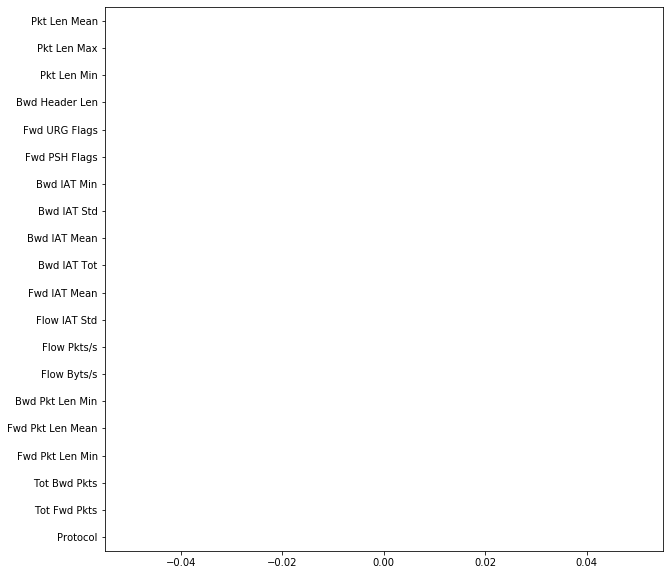

In [11]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))

In [13]:
model_file_path = r'D:\CIC\Train and Test\Filtered Corr Attr\adaBoost_model.sav'
pickle.dump(adaBoost1, open(model_file_path, 'wb'))

In [14]:
loaded_model = pickle.load(open(model_file_path, 'rb'))